# Optimization Focus

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import set_option


# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier

#deep learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Cash classification example
- 0: True cash
- 1: Fake cash

![](banknotes.png)

In [3]:
df = pd.read_csv('banknotes.csv')

In [4]:
df.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [28]:
import seaborn as sns

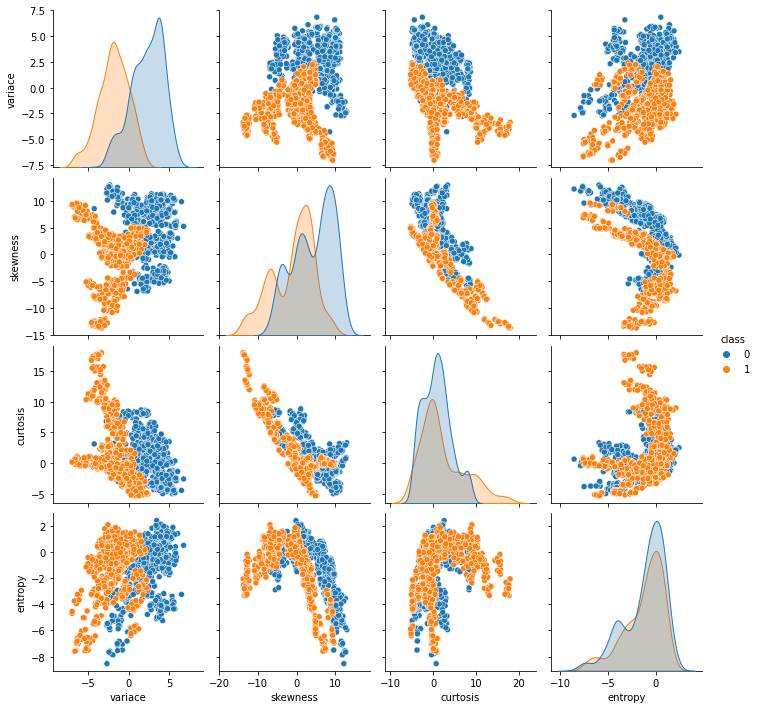

In [29]:
sns.pairplot(df, hue="class")

#### Baseline model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [31]:
X = scale(df.drop('class', axis=1).values)
y = df['class'].values

### Logistic Regression Model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [34]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [46]:
K.clear_session()

model = Sequential()
model.add(Dense(1, input_dim = 4, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)
result = model.evaluate(X_test, y_test)

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6963
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5580 - accuracy: 0.7055
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.7184
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.6968
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5293 - accuracy: 0.7170
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5152 - accuracy: 0.7270
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7403
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7434
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4820 - accuracy: 0.7580
Epoch 10/10
13/13 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.7621


In [47]:
historydf = pd.DataFrame(history.history, index=history.epoch)

Text(0.5, 1.0, 'Test accuracy: 76.2 %')

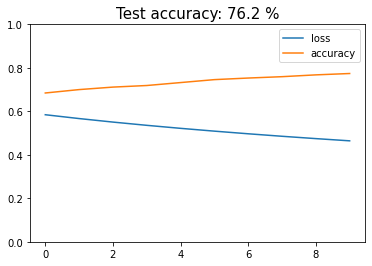

In [48]:
historydf.plot(ylim=(0,1))
plt.title("Test accuracy: {:3.1f} %".format(result[1]*100), fontsize=15)

### Learning Rates

In [51]:
dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=SGD(lr=lr),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16,epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [52]:
historydf = pd.concat(dflist, axis=1)

In [53]:
historydf

,loss,accuracy,loss,accuracy,loss,accuracy,loss,accuracy
0,1.015253,0.354167,0.486770,0.793750,0.713157,0.657292,0.280871,0.911458
1,0.796750,0.494792,0.355547,0.883333,0.308776,0.929167,0.130384,0.968750
2,0.644812,0.641667,0.302912,0.901042,0.234462,0.946875,0.096673,0.972917
3,0.542025,0.792708,0.267238,0.915625,0.193809,0.955208,0.081042,0.976042
4,0.471969,0.910417,0.239947,0.928125,0.167391,0.963542,0.071355,0.979167
5,0.422647,0.944792,0.218256,0.934375,0.148880,0.966667,0.065712,0.977083
6,0.386572,0.946875,0.200715,0.940625,0.135053,0.967708,0.061237,0.980208
7,0.359101,0.946875,0.186114,0.952083,0.124348,0.968750,0.057694,0.981250
8,0.337379,0.947917,0.173771,0.953125,0.115843,0.969792,0.055065,0.981250
9,0.319796,0.950000,0.163375,0.956250,0.108965,0.969792,0.052778,0.981250


In [54]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [55]:
historydf

learning_rate      0.01                0.05                0.10            \
metric             loss  accuracy      loss  accuracy      loss  accuracy   
0              1.015253  0.354167  0.486770  0.793750  0.713157  0.657292   
1              0.796750  0.494792  0.355547  0.883333  0.308776  0.929167   
2              0.644812  0.641667  0.302912  0.901042  0.234462  0.946875   
3              0.542025  0.792708  0.267238  0.915625  0.193809  0.955208   
4              0.471969  0.910417  0.239947  0.928125  0.167391  0.963542   
5              0.422647  0.944792  0.218256  0.934375  0.148880  0.966667   
6              0.386572  0.946875  0.200715  0.940625  0.135053  0.967708   
7              0.359101  0.946875  0.186114  0.952083  0.124348  0.968750   
8              0.337379  0.947917  0.173771  0.953125  0.115843  0.969792   
9              0.319796  0.950000  0.163375  0.956250  0.108965  0.969792   

learning_rate      0.50            
metric             loss  accuracy  
0              0.280871  0.911458  
1              0.130384  0.968750  
2              0.096673  0.972917  
3              0.081042  0.976042  
4              0.071355  0.979167  
5              0.065712  0.977083  
6              0.061237  0.980208  
7              0.057694  0.981250  
8              0.055065  0.981250  
9              0.052778  0.981250

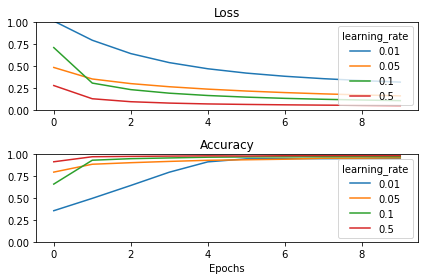

In [56]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

### Batch Sizes

In [57]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [58]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [59]:
historydf

batch_size       16                  32                  64             \
metric          loss  accuracy      loss  accuracy      loss  accuracy   
0           0.516033  0.767708  0.535165  0.838542  0.956086  0.329167   
1           0.474423  0.808333  0.499511  0.884375  0.903637  0.359375   
2           0.442386  0.833333  0.470142  0.903125  0.855564  0.393750   
3           0.416929  0.845833  0.445526  0.914583  0.811665  0.418750   
4           0.395932  0.859375  0.424607  0.920833  0.771645  0.447917   
5           0.378136  0.870833  0.406574  0.928125  0.735338  0.481250   
6           0.362765  0.876042  0.390803  0.933333  0.702302  0.506250   
7           0.349197  0.889583  0.376917  0.936458  0.672339  0.546875   
8           0.337114  0.893750  0.364516  0.938542  0.645138  0.592708   
9           0.326194  0.900000  0.353390  0.940625  0.620419  0.638542   

batch_size       128            
metric          loss  accuracy  
0           1.418049  0.327083  
1           1.369378  0.334375  
2           1.321131  0.339583  
3           1.274429  0.341667  
4           1.229550  0.346875  
5           1.185478  0.356250  
6           1.142807  0.359375  
7           1.102176  0.369792  
8           1.062588  0.375000  
9           1.024895  0.378125

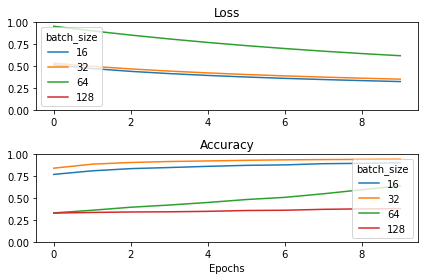

In [61]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Optimizers

In [62]:
from keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [65]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

    K.clear_session()
    
    model = Sequential()
    model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=eval(opt_name),
                  metrics=['accuracy'])
    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [66]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

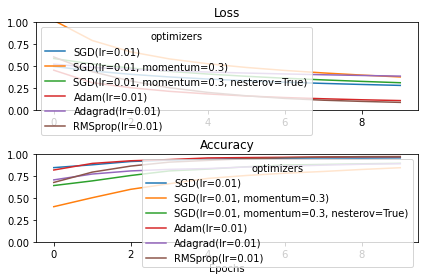

In [68]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()

## Initialization

https://keras.io/initializers/

In [70]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

    K.clear_session()

    model = Sequential()
    model.add(Dense(1, input_shape=(4,),
                    kernel_initializer=init,
                    activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    h = model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [71]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

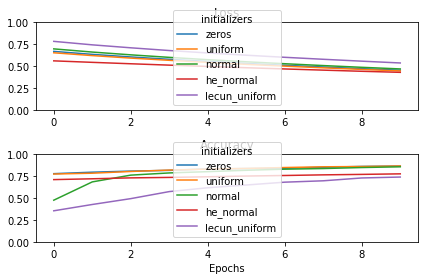

In [72]:
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('accuracy', axis=1, level='metric').plot(ylim=(0,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()